In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install yt-dlp

In [ ]:
!yt-dlp https://www.youtube.com/watch?v=lVb3sGPaGww --format m4a -o "pkeur.%(ext)s"

[youtube] Extracting URL: https://www.youtube.com/watch?v=lVb3sGPaGww
[youtube] lVb3sGPaGww: Downloading webpage
[youtube] lVb3sGPaGww: Downloading android player API JSON
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5tgoz_TLDtOJ5S ; player = https://www.youtube.com/s/player/97ea7458/player_ias.vflset/en_US/base.js
[info] lVb3sGPaGww: Downloading 1 format(s): 140
[download] Destination: pkeur.m4a
[download] 100% of   16.44MiB in 00:00:01 at 12.63MiB/s
[FixupM4a] Correcting container of "pkeur.m4a"


translating with whisper language model 

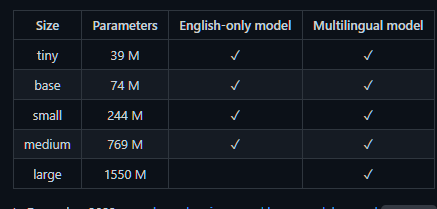

https://github.com/openai/whisper/blob/main/model-card.md

In [ ]:
!whisper "/content/pkeur.m4a" --model large --language English

2023-02-11 08:15:01.228185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 08:15:03.787879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-11 08:15:03.788060: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-11 08:15:03.788083: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [ ]:
import pandas as pd
import numpy as np
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install webvtt-py

In [ ]:
import webvtt

In [ ]:
import librosa

test sample of dataset to check if everything worked correctly
(read in Whisper's transcript, split up the audio according to Whisper's timestamps, and then print Whisper's text and play the corresponding audio)

In [ ]:
def trim_audio(row,audio,sample_rate):
  t = np.arange(len(audio))
  t = t/sample_rate
  f = np.where( (t>=row.start_s) & (t<=row.end_s) )
  return audio[f]

In [ ]:
transcript = webvtt.read('/content/pkswe.m4a.vtt')
audio,sample_rate = librosa.load('/content/pkswe.m4a')

In [ ]:
def simple_hms(s):
  h,m,sec = [float(x) for x in s.split(':')]
  return 3600*h + 60*m + sec

In [ ]:
df = pd.DataFrame(columns=['start','end','text'])
df['start'] = [x.start for x in transcript]
df['end'] = [x.end for x in transcript]
df['text'] = [x.text for x in transcript]
df['start_s'] = df['start'].apply(simple_hms)
df['end_s'] = df['end'].apply(simple_hms)
df['audio'] = df.apply(trim_audio,axis=1,args=(audio,sample_rate))

pd.options.display.max_rows = 59
df.head(25)


,start,end,text,start_s,end_s,audio
0,00:00:00.000,00:00:03.000,This clip is brought to you by,0.0,3.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00:00:03.000,00:00:05.000,Kalix Machines,3.0,5.0,"[-0.0144699225, -0.017625775, -0.017149044, -0..."
2,00:00:05.000,00:00:07.000,Exemptus Automotive,5.0,7.0,"[0.06607345, 0.07919577, 0.065237865, 0.064773..."
3,00:00:07.000,00:00:09.000,Nya,7.0,9.0,"[-0.0325269, -0.03309433, -0.04020932, -0.0452..."
4,00:00:09.000,00:00:11.000,and Deccia,9.0,11.0,"[-0.3326661, -0.3035357, -0.30698946, -0.28529..."
5,00:00:12.000,00:00:15.000,Welcome to the press conference after Luleå Ho...,12.0,15.0,"[0.37212962, 0.37231725, 0.37415117, 0.3788699..."
6,00:00:15.000,00:00:18.000,"Let's start with the guests, Thomas Mittell, h...",15.0,18.0,"[-0.055963345, -0.0917905, -0.1073797, -0.0593..."
7,00:00:18.000,00:00:23.000,"I think Luleå is beating us in the long, tough...",18.0,23.0,"[-0.008948973, 0.0015408385, 0.010846509, 0.00..."
8,00:00:23.000,00:00:26.000,and we are a bit thin and a bit small,23.0,26.0,"[-0.06100079, -0.08715866, -0.081864744, -0.06..."
9,00:00:26.000,00:00:32.000,I think Luleå has a tough and senior-like team,26.0,32.0,"[-0.16014704, -0.1563786, -0.14173989, -0.1241..."


grab a random segment of the Whisper transcript, print out the text, and play the audio. 

In [ ]:
segment = df.sample(n=1).iloc[0]
segment = df.loc[27] #specific segment
print(segment.text)
ipd.Audio(segment.audio,rate=sample_rate)

but a strong last period, I think


summaries for funsies!

In [ ]:
!pip install sumy

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import requests
with open('/content/pkeur.m4a.txt', encoding='utf-8') as file:
    textpk = file.read()
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Load the text to be summarized
text = textpk

# Initialize the parser and summarizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LexRankSummarizer()

# Summarize the text
summary = summarizer(parser.document, 100) 

# Print the summary
for sentence in summary:
  print(sentence)

you you we are beginning a press conference with the head coach of Bosconia mr. Juan Pena Roya please coach your comments about the game night congratulation to salaries for for win the game I think we can to win but in in the last minute in the second half we have had problems in an offensive situation our percentage was but the start of the game I think we play with a rhythm but no control our different rebound and Salgiris a score is a situation after often rebounds but I think the second quarter we control better our our paint but the last quarter I think in the two three or four last minutes don't don't score I think only two points in the last minute and it's very difficult in in one game games is difficult with Jonas call in the last part of the game thank you my Zalgiris a supergirl a chat we come to win and we had that advantage but in the fourth quarter we ended the game very easily we did not score a goal we lost a simple percentage although in the game we started in a good 

In [ ]:
import requests
with open('/content/pkswe.m4a.txt', encoding='utf-8') as file:
    textpk = file.read()
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Load the text to be summarized
text = textpk

# Initialize the parser and summarizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LsaSummarizer()

# Summarize the text
summary = summarizer(parser.document, 25) 

# Print the summary
for sentence in summary:
  print(sentence)


This clip is brought to you by Kalix Machines Exemptus Automotive Nya and Deccia Welcome to the press conference after Luleå Hockey Färjestad Let's start with the guests, Thomas Mittell, how do you look back on tonight's game?
I think Luleå is beating us in the long, tough games and we are a bit thin and a bit small I think Luleå has a tough and senior-like team that we can't really handle today and we need to be better and Luleå won fairly, I think so we got a point that we can be satisfied with Questions?
Henrik Stry, how do you look back on tonight's game?
I think we do at least 50 minutes really well just like Thomas says, we came out well good pressure in things today, I think we also got a penalty, which was nice for us then we have a few minutes in the second period that we definitely need to fix after that it's 4-4 before the third so I think it's mentally strong of the guys to come back and lift up the game again in the third period but we should also remember that we have a b

In [ ]:
import requests
with open('/content/pk.m4a.txt', encoding='utf-8') as file:
    textpk = file.read()
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

# Load the text to be summarized
text = textpk

# Initialize the parser and summarizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = TextRankSummarizer()

# Summarize the text
summary = summarizer(parser.document, 68) 

# Print the summary
for sentence in summary:
  print(sentence)


Welcome to the press conference after the regional match against the Berlin AK.
Today we have a little more than 800 spectators with 3-0 win.
Next to me are the two coaches of the teams.
The coach of our guests, Benjamin Duda and Derlie König.
First of all, I would like to give the floor to Benjamin Duda and ask him for his assessment of the game.
First of all, I would like to congratulate you, Danny, and Kreisfeld on the victory.
Obviously, it was a completely useless day for us.
We have made a catastrophic performance today, completely unacceptable.
In possession of the ball, never threatened the depth, played too small against the ball from our ball conquest, thus not being able to achieve a space win on the sandy background.
And how we then ultimately pass the area, the 1-0 after a throw-in, the 2-0 after a shot.
Of course, it is never possible to think about the right win here over the result.
We can speak of luck that the result did not go higher.
Kreisfeld has to lead in all cla

In [ ]:
import spacy

# Load the large English NLP model
nlp = spacy.load('en_core_web_sm')

# The text to be summarized
with open('/content/pkeur.m4a.txt', encoding='utf-8') as file:
    text = file.read()

# Process the text using spaCy
doc = nlp(text)

# Define the target length for the summary
target_length = 8400

# Create a list of sentences
sents = [sent.text for sent in doc.sents]

# Keep adding sentences until the target length is reached
summary = []
length = 0
for sent in sents:
    length += len(sent)
    summary.append(sent)
    if length > target_length:
        break

# Join the sentences to create the summary
summary = ' '.join(summary)

print(summary)


you
you
we are beginning a press conference with the head coach of Bosconia mr. Juan
Pena Roya please coach your comments about the game night
congratulation to salaries for for win the game I think we can to win but in in
the last minute in the second half we have had problems in an offensive
situation our percentage was but the start of the game I think we play with a
rhythm but no control our different rebound and Salgiris a score is a
situation after often rebounds but I think the second quarter we control
better our our paint but the last quarter I think in the two three or four
last minutes don't don't score I think only two points in the last minute and
it's very difficult in in one game
games is difficult with Jonas call in the last part of the game
thank you my Zalgiris a supergirl a chat we come to win and we had that advantage but in the fourth quarter we ended the game very easily we did not score a goal we lost a simple percentage
although in the game we started in a good 

In [ ]:
import re
from gensim.summarization import summarize

# The text to be summarized
with open('/content/pk.m4a.txt', encoding='utf-8') as file:
    text = file.read()

# Clean the text
text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)

# Summarize the text
summary = summarize(text, ratio=0.82)

print(summary)


In [ ]:
!pip install openai

In [ ]:
import os
import openai
with  open('/content/pk.m4a.txt') as file:
    textpk = file.read()

openai.api_key = "sk-openaikey"

response = openai.Completion.create(
  model="text-davinci-003",
  prompt=textpk + "\n\nTl;dr",
  temperature=0.7,
  max_tokens=10,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=1
)

[Linktext](https://)